# Анализ спроса и сегментации

**Автор**: Антонов Александр

**Контакты**: alex.antonov59@yandex.ru

## Краткая информация:

Массив данных, содержит информацию о заказах ТОП-500 товаров (СКЮ) в категории за последние 30 дней (суммарные заказы в штуках и в рублях) и некоторые дополнительные данные (например, отзывы, рейтинг карточки (=оценка карточки), рейтинг (=ранжирование в категории по внутренним алгоритмам маркетплейса) и т
д.

##  Задачи проекта

На основании этих данных подготовить следующие виды анализа:
1) влияние цены на количество заказов в штуках (оценка эластичности): определить соотношение цена-количество заказов (если есть взаимосвязь)
2) определение границ ценовых сегментов: Вам нужно выделить 4 ценовых сегмента (эконом минус, эконом, эконом плюс, премиум) - определить, какие границы цен у каждого сегмента.
3) посмотреть, есть ли влияние других факторов (кроме цены), представленных в данных, на количество заказов

## План работ:

**1. Загрузка данных и первичный анализ:**
- Изучить загруженный файл, понять его структуру и определить столбцы, которые понадобятся для анализа.

**2. Анализ влияния цены на количество заказов (оценка эластичности):**
- Построить график зависимости цены от количества заказов.
- Рассчитать коэффициент корреляции между ценой и количеством заказов.
- Провести линейную регрессию для оценки эластичности спроса.

**3. Определение границ ценовых сегментов:**
- Разделить товары на 4 ценовые сегмента: "эконом минус", "эконом", "эконом плюс", "премиум".
- Определить границы этих сегментов на основании анализа распределения цен.

**4. Анализ влияния других факторов на количество заказов:**
- Построить модели, чтобы определить влияние других факторов (например, рейтинг карточки, отзывы и т.д.) на количество заказов.
- Использовать метод множественной регрессии для оценки вклада различных факторов.

## Описание данных

Данные содержат следующие столбцы:

- СКЮ — уникальный идентификатор товара.
- Заказы, шт — количество заказов.
- Выручка по заказам, руб — выручка, полученная от заказов.
- Скидка, % — процент скидки на товар.
- Рейтинг — позиция в рейтинге товаров.
- Рейтинг по отзывам — оценка на основе отзывов.
- Отзывы, шт — количество отзывов.

# Загрузка данных и первичный анализ

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [2]:
df = pd.read_excel('C:/Users/antia/test_Junior(data).xlsx')

In [3]:
df.head()

,СКЮ,"Заказы, шт","Выручка по заказам, руб","Скидка, %",Рейтинг,Рейтинг по отзывам,"Отзывы, шт"
0,1,55061,20556280,60,6.41,5,49950
1,2,10336,12212722,52,43.25,5,35852
2,3,34051,11088377,76,237.00,5,30181
3,4,8645,10854202,50,31.96,5,35852
4,5,32851,9690836,61,186.88,5,21424


In [4]:
# Функция получения первичной информации о датафрейме
def first_look (data): 
    print('\033[1m' + '*'*25, 'Первые 5 строк', '*'*25 + '\033[0m') 
    display(data.head()) 
    
    #print('\033[1m' + '---------Случайные 5 строк-----------' + '\033[0m') 
    #display(data.sample(5)) 

    print('\033[1m' + '*'*25, 'Последние 5 строк', '*'*25 + '\033[0m') 
    display(data.tail()) 

    print('\033[1m' + '*'*25, 'Типы данных', '*'*25 + '\033[0m') 
    data.info()

    print('\033[1m' + '*'*25, 'Статистическая сводка', '*'*25 + '\033[0m') 
    display(data.describe()) 

    print('\033[1m' + '*'*25, 'Пропуски', '*'*25 + '\033[0m') 
    display(data.isnull().sum())

    print('\033[1m' + '*'*25, 'Процент пропусков от всего датасета', '*'*25 + '\033[0m')
    display(data.isna().mean().sort_values(ascending=False)*100) 

    print('\033[1m' + '*'*25, 'Дубликаты', '*'*25 + '\033[0m') 
    print('Дубликатов: ', data.duplicated().sum())
    
    print('\033[1m' + '*'*25, 'Уникальные значения в таблице', '*'*25 + '\033[0m')
    display(data.nunique())

In [5]:
first_look(df)

************************* Первые 5 строк *************************


,СКЮ,"Заказы, шт","Выручка по заказам, руб","Скидка, %",Рейтинг,Рейтинг по отзывам,"Отзывы, шт"
0,1,55061,20556280,60,6.41,5,49950
1,2,10336,12212722,52,43.25,5,35852
2,3,34051,11088377,76,237.00,5,30181
3,4,8645,10854202,50,31.96,5,35852
4,5,32851,9690836,61,186.88,5,21424


************************* Последние 5 строк *************************


,СКЮ,"Заказы, шт","Выручка по заказам, руб","Скидка, %",Рейтинг,Рейтинг по отзывам,"Отзывы, шт"
495,496,1357,569348,60,3.24,5,3272
496,497,678,564787,72,22.36,5,2454
497,498,1735,563875,67,5.88,5,48601
498,499,275,562499,60,13.05,5,166
499,500,1173,562368,63,2.53,5,5172


************************* Типы данных *************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   СКЮ                      500 non-null    int64  
 1   Заказы, шт               500 non-null    int64  
 2   Выручка по заказам, руб  500 non-null    int64  
 3   Скидка, %                500 non-null    int64  
 4   Рейтинг                  500 non-null    float64
 5   Рейтинг по отзывам       500 non-null    int64  
 6   Отзывы, шт               500 non-null    int64  
dtypes: float64(1), int64(6)
memory usage: 27.5 KB
************************* Статистическая сводка *************************


,СКЮ,"Заказы, шт","Выручка по заказам, руб","Скидка, %",Рейтинг,Рейтинг по отзывам,"Отзывы, шт"
count,500.000000,500.000000,5.000000e+02,500.000000,500.000000,500.000000,500.000000
mean,250.500000,2537.654000,1.538000e+06,60.336000,83.670320,4.988000,14981.328000
std,144.481833,4266.631766,1.708696e+06,13.487733,77.697202,0.108994,16744.090465
min,1.000000,206.000000,5.623680e+05,20.000000,1.210000,4.000000,14.000000
25%,125.750000,902.750000,7.203390e+05,52.000000,13.955000,5.000000,2170.000000
50%,250.500000,1403.000000,9.845290e+05,60.000000,64.160000,5.000000,8782.000000
75%,375.250000,2525.000000,1.646286e+06,71.000000,133.197500,5.000000,25876.000000
max,500.000000,55061.000000,2.055628e+07,95.000000,296.000000,5.000000,55810.000000


************************* Пропуски *************************


СКЮ                        0
Заказы, шт                 0
Выручка по заказам, руб    0
Скидка, %                  0
Рейтинг                    0
Рейтинг по отзывам         0
Отзывы, шт                 0
dtype: int64

************************* Процент пропусков от всего датасета *************************


СКЮ                        0.0
Заказы, шт                 0.0
Выручка по заказам, руб    0.0
Скидка, %                  0.0
Рейтинг                    0.0
Рейтинг по отзывам         0.0
Отзывы, шт                 0.0
dtype: float64

************************* Дубликаты *************************
Дубликатов:  0
************************* Уникальные значения в таблице *************************


СКЮ                        500
Заказы, шт                 468
Выручка по заказам, руб    500
Скидка, %                   64
Рейтинг                    440
Рейтинг по отзывам           2
Отзывы, шт                 218
dtype: int64

## Общая информация о датасете:

Пропуски отсутствуют. Дубликатов нет. Типы данных соответствуют данным.

На основании статистической сводки.

**Общее количество заказов:**

Среднее количество заказов — 2537 шт, но стандартное отклонение довольно велико (4266), что указывает на значительную вариацию между товарами.
Максимальное количество заказов — 55061, а минимальное — 206, что также подтверждает разброс данных.

**Выручка:**

Средняя выручка по каждому товару — около 1,5 млн рублей, но стандартное отклонение также велико (1,7 млн рублей).
Максимальная выручка — более 20 млн рублей, а минимальная — 562 368 рублей, что говорит о сильной дифференциации товаров.

**Скидка:**

Средняя скидка составляет около 60%, что указывает на то, что скидки на товары являются значительными.
Минимальная скидка — 20%, а максимальная — 95%, что опять же говорит о большом разбросе в данных.

**Рейтинг и отзывы:**

Средний рейтинг (83,67) довольно высокий, с минимальным значением 1,21 и максимальным — 296. Это может означать, что рейтинг строится на нескольких показателях (например, количество отзывов или активность покупателей).
Рейтинг по отзывам стабилен: большинство товаров имеют рейтинг 5 (межквартильный размах: 4-5).
Количество отзывов варьируется от 14 до 55 810, что опять же свидетельствует о сильной дифференциации популярности товаров.

В целом, данные показывают сильные различия между товарами по ключевым показателям: заказы, выручка и отзывы.

# Анализ влияния цены на количество заказов (оценка эластичности)

In [6]:
## Добавим столбец с ценой товара после реализации, т.е. со скидкой, т.к. расчитывается из фактических данных после реализации.
## Выбор цены именно со скидкой обусловлен тем, что потребитель видит и ориентируется по цене уже со скидкой
df['p_price'] = ((df['Выручка по заказам, руб'] / df['Заказы, шт'])/(100-df['Скидка, %'])*100).round(2)

## добавим p_price - цена первоночальная, без скидки, для дополнительной оценки в п.4
df['p_price'] = ((df['Выручка по заказам, руб'] / df['Заказы, шт'])/(1 - df['Скидка, %'] / 100)).round(2)

In [7]:
# Добавляем столбец с расчетом цены (цена = выручка / количество заказов)
df['price'] = df['Выручка по заказам, руб'] / df['Заказы, шт']
df.head()

,СКЮ,"Заказы, шт","Выручка по заказам, руб","Скидка, %",Рейтинг,Рейтинг по отзывам,"Отзывы, шт",p_price,price
0,1,55061,20556280,60,6.41,5,49950,933.34,373.336481
1,2,10336,12212722,52,43.25,5,35852,2461.61,1181.571401
2,3,34051,11088377,76,237.00,5,30181,1356.83,325.640275
3,4,8645,10854202,50,31.96,5,35852,2511.09,1255.546790
4,5,32851,9690836,61,186.88,5,21424,756.39,294.993638


In [8]:
# Список данных для анализа и соответствующие заголовки
datasets = [(df, 'до удаления выбросов')]

# Удаление выбросов
Q1 = df['Заказы, шт'].quantile(0.25)
Q3 = df['Заказы, шт'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_clean = df[(df['Заказы, шт'] >= lower_bound) & (df['Заказы, шт'] <= upper_bound)]
datasets.append((df_clean, 'после удаления выбросов'))

# Вывод результатов
print('Количество данных до очистки:', df['СКЮ'].count())
print('Количество данных после очистки:', df_clean['СКЮ'].count())
print('Процент уменьшения данных:', (((df['СКЮ'].count() - df_clean['СКЮ'].count())/df['СКЮ'].count()) *100), '%')

df_clean.describe()

Количество данных до очистки: 500
Количество данных после очистки: 451
Процент уменьшения данных: 9.8 %


,СКЮ,"Заказы, шт","Выручка по заказам, руб","Скидка, %",Рейтинг,Рейтинг по отзывам,"Отзывы, шт",p_price,price
count,451.000000,451.000000,4.510000e+02,451.000000,451.000000,451.000000,451.000000,451.000000,451.000000
mean,273.026608,1597.330377,1.177152e+06,60.221729,81.515344,4.988914,13198.421286,2481.278093,888.698151
std,133.497779,1063.185885,7.385172e+05,13.653313,77.065651,0.104823,15525.770983,1491.101810,450.254552
min,16.000000,206.000000,5.623680e+05,20.000000,1.210000,4.000000,14.000000,602.590000,207.717634
25%,162.500000,860.500000,6.983335e+05,52.000000,12.500000,5.000000,1919.000000,1435.395000,577.011180
50%,275.000000,1257.000000,9.249040e+05,60.000000,61.900000,5.000000,6494.000000,2123.150000,756.113158
75%,387.500000,2081.000000,1.371088e+06,71.000000,129.385000,5.000000,14355.000000,3101.450000,1099.875394
max,500.000000,4908.000000,5.565985e+06,95.000000,296.000000,5.000000,55810.000000,10423.480000,2843.339483


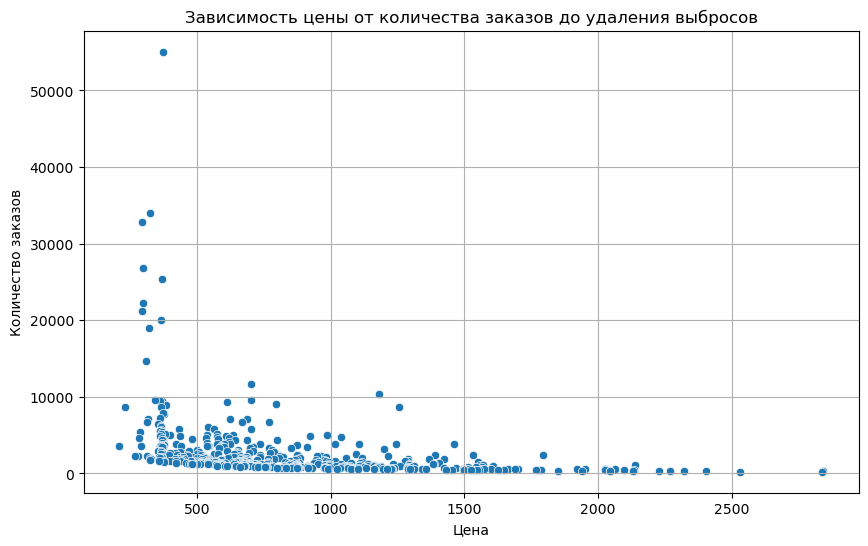

Коэффициент корреляции до удаления выбросов: -0.3216198642621983


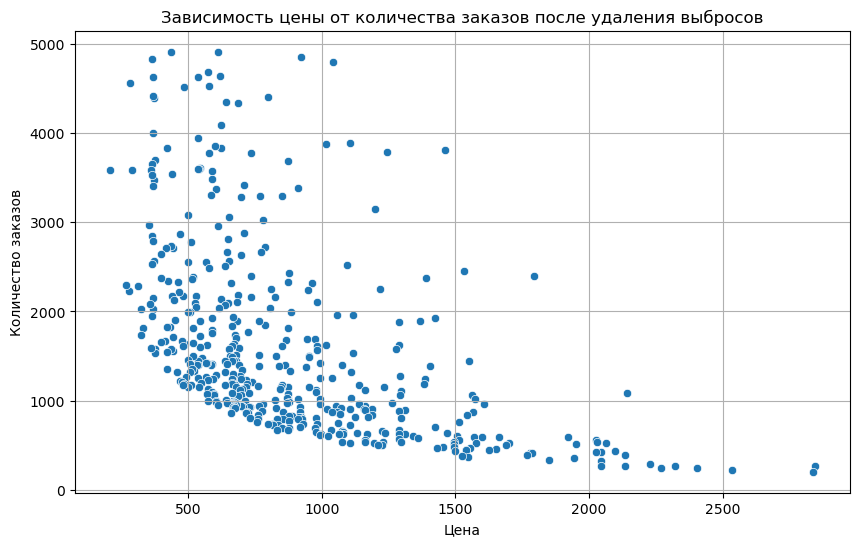

Коэффициент корреляции после удаления выбросов: -0.5074769569812391


In [9]:
# Цикл для анализа зависимости цены от количества заказов
for data, title_suffix in datasets:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='price', y='Заказы, шт', data=data)
    plt.title(f'Зависимость цены от количества заказов {title_suffix}')
    plt.xlabel('Цена')
    plt.ylabel('Количество заказов')
    plt.grid(True)
    plt.show()

    # Рассчитываем коэффициент корреляции
    correlation = data['price'].corr(data['Заказы, шт'])
    print(f'Коэффициент корреляции {title_suffix}: {correlation}')

Корреляция между ценой и количеством заказов в исходных данных составила -0.32, что указывает на слабую отрицательную взаимосвязь. Это означает, что с ростом цены количество заказов имеет тенденцию снижаться, но влияние не является очень сильным.

Удаления выбросов по количеству заказов дает нам сфокусировать внимание на 90 % товаров без аномально высоких продаж.
Коэффициент корреляции после удаления выбросов равен -0.51, что указывает на умеренную отрицательную корреляцию между ценой и количеством заказов. Это означает:

- По мере увеличения цены количество заказов имеет тенденцию к снижению.
- Корреляция не является очень сильной, но достаточной, чтобы предположить наличие зависимости.

Вывод: Увеличение цены, с вероятностью, будет приводить к уменьшению числа заказов, хотя эта связь не является абсолютной, и на спрос могут влиять и другие факторы.

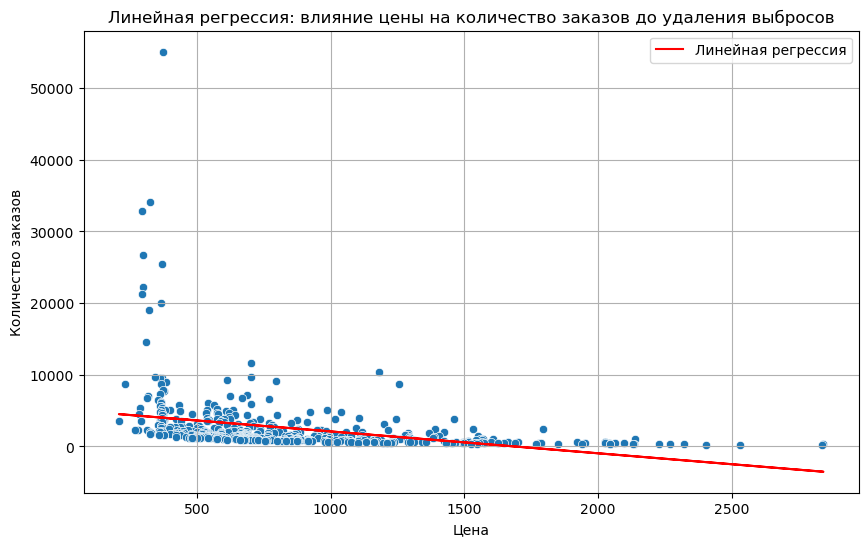

Коэффициент эластичности до удаления выбросов: -3.0501726669400973


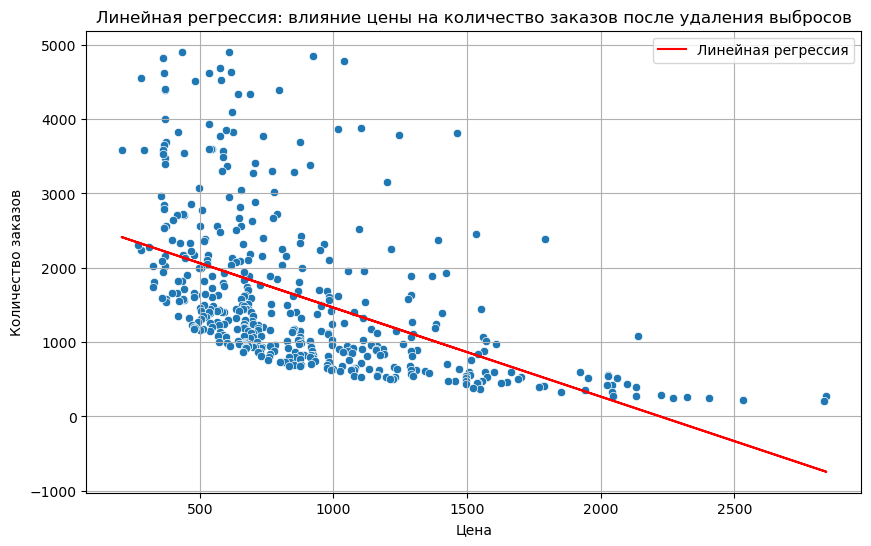

Коэффициент эластичности после удаления выбросов: -1.1983051266917681


In [10]:
# Цикл для анализа коэффициента эластичности
for data, title_suffix in datasets:
    # Построение графика зависимости и регрессии
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='price', y='Заказы, шт', data=data)
    
    # Линейная регрессия
    x = data[['price']]
    y = data['Заказы, шт']
    reg_model = LinearRegression()
    reg_model.fit(x, y)
    y_pred = reg_model.predict(x)
    
    plt.plot(data['price'], y_pred, color='red', label='Линейная регрессия')
    plt.title(f'Линейная регрессия: влияние цены на количество заказов {title_suffix}')
    plt.xlabel('Цена')
    plt.ylabel('Количество заказов')
    plt.grid(True)
    plt.legend()
    plt.show()

    # Коэффициент эластичности
    elasticity = reg_model.coef_[0]
    print(f'Коэффициент эластичности {title_suffix}: {elasticity}')

Коэффициент эластичности составил -3.05, что означает, что при увеличении цены на 1 единицу количество заказов снижается примерно на 3 единицы. Это свидетельствует о высокой чувствительности спроса к изменению цены. Скорее всего это касается товаров с высокими продажами, т.к.:

Коэффициент эластичности после удаления выбросов равен -1.20. Это значение говорит о том, что спрос является эластичным, то есть чувствительным к изменениям цены. В данном случае:

При увеличении цены на 1%, количество заказов уменьшается примерно на 1.2%.
Поскольку коэффициент меньше -1, можно сделать вывод, что повышение цены вызывает более чем пропорциональное снижение спроса.

Вывод: Спрос на товары после удаления выбросов демонстрирует высокую чувствительность к изменению цены. Это значит, что повышение цены может привести к значительному снижению количества заказов. 

## Вывод:

1. Увеличение цены, с вероятностью, будет приводить к уменьшению числа заказов, хотя эта связь не является абсолютной, и на спрос могут влиять и другие факторы.
2. Спрос на товары после удаления выбросов демонстрирует высокую чувствительность к изменению цены. Это значит, что повышение цены может привести к значительному снижению количества заказов. 

# Определение границ ценовых сегментов:

Границы сегментов до удаления выбросов: [ 536.64  704.29 1060.77]


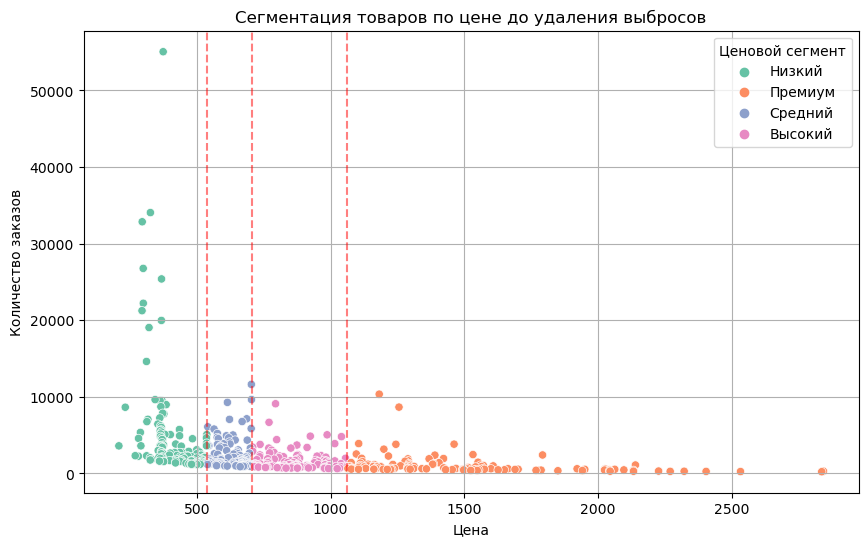

Границы сегментов после удаления выбросов: [ 577.01  756.11 1099.88]


C:\Users\antia\AppData\Local\Temp\ipykernel_21788\2653756653.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['price_segment'] = data['price'].apply(assign_price_segment)


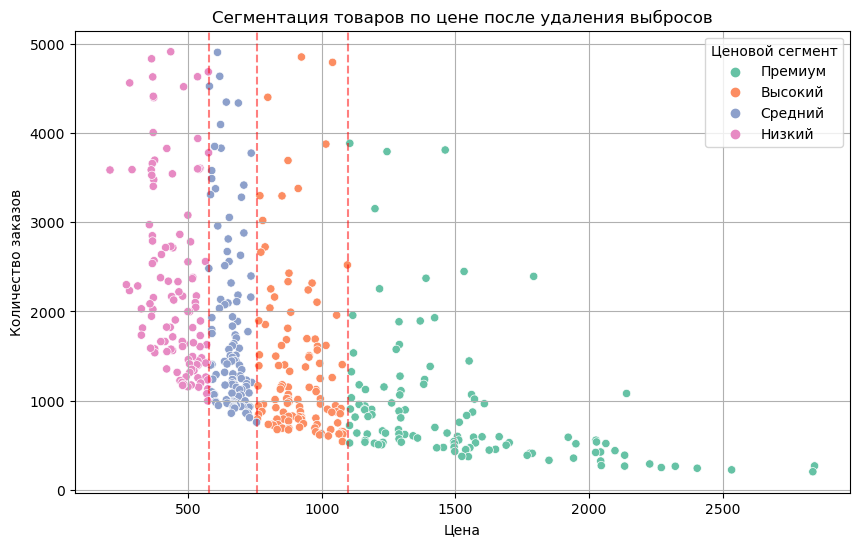

In [11]:
# Цикл для сегментации данных и построения графиков
for data, title_suffix in datasets:
    # Разделение на сегменты по квантилям
    price_quantiles = np.percentile(data['price'], [25, 50, 75])
    print(f'Границы сегментов {title_suffix}:', price_quantiles.round(2))
    
    # Функция для присвоения ценовых сегментов (переименована)
    def assign_price_segment(price):
        if price <= price_quantiles[0]:
            return 'Низкий'
        elif price <= price_quantiles[1]:
            return 'Средний'
        elif price <= price_quantiles[2]:
            return 'Высокий'
        else:
            return 'Премиум'
    
    # Присвоение ценовых сегментов
    data['price_segment'] = data['price'].apply(assign_price_segment)
    
    # Построение scatter plot с сегментацией по цветам
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='price', y='Заказы, шт', hue='price_segment', data=data, palette='Set2')
    
    # Добавление линий разделения на график
    for quantile in price_quantiles:
        plt.axvline(quantile, color='red', linestyle='--', alpha=0.5)
    
    plt.title(f'Сегментация товаров по цене {title_suffix}')
    plt.xlabel('Цена')
    plt.ylabel('Количество заказов')
    plt.legend(title='Ценовой сегмент')
    plt.grid(True)
    plt.show()

Для выделения четырех ценовых сегментов ("эконом минус", "эконом", "эконом плюс", "премиум") используется квантильное разбиение. 

Эконом минус: товары с ценой ниже первого квартиля (25%).

Эконом: товары с ценой между первым и вторым квартилями (25%–50%).

Эконом плюс: товары с ценой между вторым и третьим квартилями (50%–75%).

Премиум: товары с ценой выше третьего квартиля (75%).

Колличество заказов плавно снижается относительно стоймости товара. Речь о разных товарах.

Так же отметим, что основная часть товаров с аномально высоким спросом лежат в Эконом минус категории.

# Анализ влияния других факторов на количество заказов:

In [12]:
# Подсчёт количества строк, где 'Рейтинг по отзывам' равен 4
print(df.loc[df['Рейтинг по отзывам'] == 4].shape[0])
print(df_clean.loc[df['Рейтинг по отзывам'] == 4].shape[0])

6
5


In [13]:
# Цикл для анализа каждого набора данных
for data, title_suffix in datasets:
    print(f"Анализ для данных {title_suffix}:")

    # Выбор переменных для анализа
    X = data[['Выручка по заказам, руб', 'Скидка, %', 'Рейтинг', 'Рейтинг по отзывам', 'Отзывы, шт', 'p_price', 'price']]  
    y = data['Заказы, шт']
    
    # Разделение на обучающую и тестовую выборки
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Обучение модели линейной регрессии
    reg_model = LinearRegression()
    reg_model.fit(X_train, y_train)
    
    # Оценка точности модели
    y_pred = reg_model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    print(f"R^2 модели: {r2}")
    
    # Коэффициенты регрессии
    coefficients = pd.DataFrame(reg_model.coef_, X.columns, columns=['Coefficient'])
    print(coefficients)
    print("\n" + "="*50 + "\n")

Анализ для данных до удаления выбросов:
R^2 модели: 0.8565441585064202
                         Coefficient
Выручка по заказам, руб     0.001837
Скидка, %                   5.520100
Рейтинг                     2.283600
Рейтинг по отзывам      -1576.644951
Отзывы, шт                 -0.001995
p_price                    -0.200808
price                      -1.628944


Анализ для данных после удаления выбросов:
R^2 модели: 0.8330372413003939
                         Coefficient
Выручка по заказам, руб     0.001029
Скидка, %                   4.074450
Рейтинг                     0.197084
Рейтинг по отзывам       -400.850599
Отзывы, шт                  0.007456
p_price                    -0.094632
price                      -0.962949




На основании проведённого анализа:

1. Качество модели: 
- До удаления выбросов коэффициент детерминации R² составил 0.86, что указывает на хорошую объясняющую способность модели: она объясняет 85.65% вариации в количестве заказов.
- После удаления выбросов R² снизился до 83.3%, что также свидетельствует о высокой точности модели, но с некоторым уменьшением объясняющей способности (примерно на 2.3%).
2. Коэффициенты регрессии:
- До удаления выбросов:

Выручка по заказам, руб (0.001837): Положительное влияние, но небольшое, что может свидетельствовать о слабой зависимости между выручкой и количеством заказов.

Скидка, % (5.520100): Положительное влияние, т.е. увеличение скидки приводит к росту количества заказов.

Рейтинг (2.283600): Положительная связь между рейтингом и количеством заказов, что логично — чем выше рейтинг, тем больше заказов.

Рейтинг по отзывам (-1576.644951): Очень сильное отрицательное влияние. Небольшое количество записей с рейтингом 4 может быть причиной для возможного искажения результатов или недостаточной представительности этого рейтинга в модели.

Отзывы, шт (-0.001995): Негативная, но слабая связь, что может означать, что количество отзывов напрямую не влияет на количество заказов.

p_price (-0.200808): Отрицательная связь, возможно, указывающая на то, что увеличение цены без скидки снижает количество заказов.

price (-1.628944): Сильное отрицательное влияние, что подтверждает ожидания — увеличение цены снижает количество заказов.


- После удаления выбросов:

Скидка продолжает оказывать положительное влияние, но его эффект уменьшился до 4.07 заказов.

Рейтинг (0.197084): Положительная связь между рейтингом и количеством заказов сохранилась, но коэффициент значительно уменьшился. Значение 0.197084 указывает на то, что увеличение рейтинга на единицу связано с увеличением количества заказов на примерно 0.20 единицы. Рейтинг особенно влияет на товары с аномальным спросом.

Цена также продолжает оказывать негативное влияние, но её влияние снизилось (с -1.63 до -0.96). Как и цены без скидки с -0.2 до -0.095

Выводы:
Удаление выбросов привело к уменьшению влияния крайних значений, что сделало модель более стабильной.
Основное прямое влияние оказывают: Скидка и Рейтинг. Обратную зависимость демострирует: Цена.
Несмотря на некоторое снижение R², модель остаётся достаточно точной для анализа.

# Вывод:

Коэффициент корреляции равен -0.51, что указывает на умеренную отрицательную корреляцию между ценой и количеством заказов. Увеличение цены, с вероятностью, будет приводить к уменьшению числа заказов, хотя эта связь не является абсолютной.

При увеличении цены на 1%, количество заказов уменьшается примерно на 1.2%. Поскольку коэффициент эластичности меньше -1, можно сделать вывод, что повышение цены вызывает более чем пропорциональное снижение спроса. Это значит, что повышение цены может привести к значительному снижению количества заказов.

Для выделения четырех ценовых сегментов ("эконом минус", "эконом", "эконом плюс", "премиум") использовали квантильное разбиение.

Количество заказов плавно снижается относительно стоимости товара. Речь о разных товарах.

Так же отметим, что основная часть товаров с аномально высоким спросом лежат в Эконом минус категории.

Влияния факторов на количество заказов:

Основное прямое влияние оказывают: Скидка и Рейтинг. Обратную зависимость демонстрирует: Цена.